## Text Analysis
Example notebook

In [2]:
# All the imports
from pprint import pformat, pprint
import requests
import json
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy
from nltk.stem import PorterStemmer

In [3]:
# Use api to get news articles about a specific ticker
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-news"

querystring = {"category":"IBM","region":"US"}

headers = {
    'x-rapidapi-key': "",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [4]:
# Check if response is successful then get text
# Otherwise, we would wait try the call again
if response.status_code == 200:
    raw_response = response.text

In [5]:
# Print raw response 
print(pformat(raw_response)[:2500])

('{"items":{"result":[{"uuid":"e4b3aed7-1bb6-3347-87ab-bcd6adb186c1","title":"How '
 'the Best Workplaces in Technology plan to go from virtual to hybrid '
 'workplaces","link":"https://finance.yahoo.com/news/best-workplaces-technology-plan-virtual-110006675.html","summary":"Industry '
 'leaders do not plan to return to offices in the same way they operated in '
 '2019, nor do they expect to preserve a fully virtual work '
 'experience.","publisher":"Fortune","author":"Claire Hastwell, Great Place To '
 'Work","type":"story","entities":[{"term":"TICKER:IBM","label":"International '
 'Business Machines","score":1.0}],"offnet":false,"content":"<p></p>\\n<!-- '
 'wp:paragraph --> \\n<p>Aron Ain is a face-to-face kind of leader.</p> '
 '\\n<!-- /wp:paragraph --> \\n<!-- wp:paragraph --> \\n<p>The CEO of HR and '
 'workforce management software company UKG likes being in the same room with '
 'people, connecting in that way only handshakes and hugs can accomplish.</p> '
 '\\n<!-- /wp:paragr

In [15]:
# Convert api response to json and extract text content for all articles
raw_text_list = []
for r in response_dict['items']['result']:
    if r['content']:
        raw_text_list.append(r['content'])
print(len(raw_text_list))

35


In [16]:
# get text titles for all articles
raw_title_list = []
for r in response_dict['items']['result']:
    if r['content']:
        raw_title_list.append(r['title'])
print(len(raw_title_list))

35


In [36]:
# Grab a short one to use as an example
raw_text = raw_text_list[0]
for rt in raw_text_list:
    if len(rt) < len(raw_text):
        raw_text = rt
# I like number 6 though...
raw_text = raw_text_list[5]

In [37]:
# Remove html tags
soup = BeautifulSoup(raw_text)
clean_text = soup.get_text()
print(clean_text)

IBM (IBM) closed at $134.93 in the latest trading session, marking a +0.53% move from the prior day. This change outpaced the S&P 500's 0.15% gain on the day.
Prior to today's trading, shares of the technology and consulting company had gained 8.91% over the past month. This has outpaced the Computer and Technology sector's gain of 5.14% and the S&P 500's gain of 6.19% in that time.
Investors will be hoping for strength from IBM as it approaches its next earnings release. The company is expected to report EPS of $1.66, down 9.78% from the prior-year quarter. Meanwhile, our latest consensus estimate is calling for revenue of $17.44 billion, down 0.73% from the prior-year quarter.
Looking at the full year, our Zacks Consensus Estimates suggest analysts are expecting earnings of $11.17 per share and revenue of $74.38 billion. These totals would mark changes of +28.84% and +1.03%, respectively, from last year.
Any recent changes to analyst estimates for IBM should also be noted by investor

---
### What do we need?
- stopwords: A list of really common words, like articles, pronouns, prepositions, and conjunctions
- punkt: A data model created by Jan Strunk that NLTK uses to split full texts into word lists

In [18]:
# Download the appropriate dictionaries and corpora
nltk.download()

<IPython.core.display.Javascript object>

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [38]:
# Let's look at some stop words
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:25]

<IPython.core.display.Javascript object>

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [39]:
# Tokenize text by sentence and word
sentences = nltk.sent_tokenize(clean_text)
tokens = nltk.word_tokenize(clean_text)
# How many words do we have?
print("sentences", len(sentences))
print("words", len(tokens))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sentences 31
words 607


In [40]:
# Remove stop words
word_list = [t for t in tokens if t not in stopwords]
print("non-stop words", len(word_list))

non-stop words 429


In [41]:
# Remove stop words and lower before check, see the difference?
word_list = [t for t in tokens if t.lower() not in stopwords]
print("lower non-stop words", len(word_list))

lower non-stop words 410


In [42]:
# What did we remove?
stop_words_removed = [t for t in tokens if t.lower() in stopwords]
pprint(set(stop_words_removed))

{'Any',
 'As',
 'Its',
 'Our',
 'S',
 'The',
 'These',
 'This',
 'To',
 'a',
 'all',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'being',
 'by',
 'can',
 'down',
 'for',
 'from',
 'had',
 'has',
 'have',
 'here',
 'in',
 'into',
 'is',
 'it',
 'its',
 'of',
 'on',
 'our',
 'over',
 'should',
 'so',
 'that',
 'the',
 'these',
 'this',
 'to',
 'we',
 'which',
 'will',
 'with',
 'you'}


In [45]:
# Identify parts of speech; print first 50
parts_of_speech = nltk.pos_tag(word_list)
parts_of_speech[:50]

<IPython.core.display.Javascript object>

[('IBM', 'NNP'),
 ('(', '('),
 ('IBM', 'NNP'),
 (')', ')'),
 ('closed', 'VBD'),
 ('$', '$'),
 ('134.93', 'CD'),
 ('latest', 'JJS'),
 ('trading', 'NN'),
 ('session', 'NN'),
 (',', ','),
 ('marking', 'VBG'),
 ('+0.53', 'CD'),
 ('%', 'NN'),
 ('move', 'NN'),
 ('prior', 'RB'),
 ('day', 'NN'),
 ('.', '.'),
 ('change', 'NN'),
 ('outpaced', 'VBD'),
 ('&', 'CC'),
 ('P', 'NNP'),
 ('500', 'CD'),
 ("'s", 'POS'),
 ('0.15', 'CD'),
 ('%', 'NN'),
 ('gain', 'NN'),
 ('day', 'NN'),
 ('.', '.'),
 ('Prior', 'NNP'),
 ('today', 'NN'),
 ("'s", 'POS'),
 ('trading', 'NN'),
 (',', ','),
 ('shares', 'NNS'),
 ('technology', 'NN'),
 ('consulting', 'VBG'),
 ('company', 'NN'),
 ('gained', 'VBD'),
 ('8.91', 'CD'),
 ('%', 'NN'),
 ('past', 'JJ'),
 ('month', 'NN'),
 ('.', '.'),
 ('outpaced', 'VBN'),
 ('Computer', 'NNP'),
 ('Technology', 'NNP'),
 ('sector', 'NN'),
 ("'s", 'POS'),
 ('gain', 'JJ')]

In [47]:
# Let's look at a frequency distribution of words
fd = nltk.FreqDist(word_list)
fd.most_common(20)

<IPython.core.display.Javascript object>

[('.', 29),
 (',', 24),
 ('%', 12),
 ('IBM', 10),
 ('Zacks', 9),
 ("'s", 8),
 ('Rank', 6),
 ('$', 5),
 ('ratio', 5),
 ('industry', 5),
 ('(', 4),
 (')', 4),
 ('latest', 4),
 ('trading', 4),
 ('company', 4),
 ('estimate', 4),
 ('#', 4),
 ('average', 4),
 ('gain', 3),
 ('Computer', 3)]

In [48]:
# Only get alphanumeric words
word_list = [word for word in word_list if word.isalnum()]

In [49]:
# Show word frequency
fd = nltk.FreqDist(word_list)
fd.tabulate(12)

<IPython.core.display.Javascript object>

     IBM    Zacks     Rank    ratio industry   latest  trading  company estimate  average     gain Computer 
      10        9        6        5        5        4        4        4        4        4        3        3 


In [50]:
# Lowered can be different frequency
lower_fd = nltk.FreqDist([w.lower() for w in word_list])
lower_fd.tabulate(12)

<IPython.core.display.Javascript object>

     ibm    zacks industry     rank    ratio   latest  trading  company estimate research  average     gain 
      10        9        7        6        5        4        4        4        4        4        4        3 


In [53]:
# Stemming
stemmed_word_list = []
for w in word_list:
    stemmed_word_list.append(PorterStemmer().stem(w))
for i in range(0,30):
    print(word_list[i], " => ", stemmed_word_list[i])

IBM  =>  ibm
IBM  =>  ibm
closed  =>  close
latest  =>  latest
trading  =>  trade
session  =>  session
marking  =>  mark
move  =>  move
prior  =>  prior
day  =>  day
change  =>  chang
outpaced  =>  outpac
P  =>  P
500  =>  500
gain  =>  gain
day  =>  day
Prior  =>  prior
today  =>  today
trading  =>  trade
shares  =>  share
technology  =>  technolog
consulting  =>  consult
company  =>  compani
gained  =>  gain
past  =>  past
month  =>  month
outpaced  =>  outpac
Computer  =>  comput
Technology  =>  technolog
sector  =>  sector


In [52]:
# Lowered can be different frequency
stemmed_lower_fd = nltk.FreqDist([w.lower() for w in stemmed_word_list])
stemmed_lower_fd.tabulate(12)

<IPython.core.display.Javascript object>

     ibm     zack industri    estim     rank    chang    ratio   latest    trade      day     gain  compani 
      10        9        9        6        6        5        5        4        4        4        4        4 


## What can we use word frequency for?

In [54]:
# Get a big list of words, like a million
!wget http://norvig.com/big.txt

--2021-04-09 11:48:19--  http://norvig.com/big.txt
Resolving norvig.com (norvig.com)... 158.106.138.13
Connecting to norvig.com (norvig.com)|158.106.138.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6488666 (6.2M) [text/plain]
Saving to: ‘big.txt’

big.txt             100%[===================>]   6.19M  9.16MB/s    in 0.7s    

2021-04-09 11:48:20 (9.16 MB/s) - ‘big.txt’ saved [6488666/6488666]



In [81]:
# norvig.com/spell-correct.html
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [82]:
# Spell check all words
for w in word_list:
    if correction(w) != w:
        print(w, correction(w))

outpaced outlawed
P a
Prior prior
outpaced outlawed
Computer computer
Technology technology
P a
Investors investors
Meanwhile meanwhile
Looking looking
Zacks backs
Consensus consensus
Estimates estimates
analysts analysis
totals total
trends tends
Based based
Zacks backs
Rank bank
Zacks backs
Rank bank
Strong strong
Buy buy
Strong strong
Sell well
generating generation
1988 1898
Within within
Zacks backs
Rank bank
Hold old
Looking looking
Forward forward
Forward forward
Also also
metric merit
Computer computer
Integrated integrated
Systems systems
Computer computer
Technology technology
Zacks backs
Industry industry
Rank bank
Zacks backs
Industry industry
Rank bank
gauges gauge
Zacks backs
Rank bank
rated rate
Want want
Zacks backs
Investment investment
Research research
Today today
Best west
Stocks stocks
Next next
Days days
Click click
Zacks backs
Investment investment
Research research


Not quite what we had in mind, would be better to use a dictionary with more domain/industrty specific terms

In [55]:
# NLTK built in sentiment analysis
sia = SentimentIntensityAnalyzer()
print("clean", sia.polarity_scores(clean_text))
print("raw", sia.polarity_scores(raw_text))

clean {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.9952}
raw {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.9953}


In [56]:
# Sentence sentiment
sentence_sentiment = []
for s in sentences:
    score = sia.polarity_scores(s)['compound']
    sentence_sentiment.append(score)
print("mean", numpy.mean(sentence_sentiment))
print("max", numpy.max(sentence_sentiment))
print("min", numpy.min(sentence_sentiment))

mean 0.25667096774193554
max 0.7783
min 0.0


In [61]:
# TF-IDF; from sklearn example
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
print(feature_names)
print(vectors.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [62]:
# Lets look at the vectors
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

<IPython.core.display.Javascript object>

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [59]:
# Lets vectorize a new doc or string to query on
search_str = "find me the second doc"
response = vectorizer.transform([search_str])
print(response)

  (0, 6)	0.46263733109032296
  (0, 5)	0.8865476297873808


In [63]:
# Now that we have them vectorized, lets compare how close they are using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(response, dense)

array([[0.17769217, 0.60757889, 0.12357218, 0.17769217]])

In [47]:
# What does the tf-idf vector look like for our documents?
# Probably should clean up our input...
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(raw_text_list)
feature_names = vectorizer.get_feature_names()
print(feature_names[:50])
print(vectors.shape)

['000', '003', '01', '02', '03', '0376', '04', '05', '05e25f7915f3d6961013eb12a4f24fc4', '06', '069ee875b100ebff7f3aaa602dc04d07', '07', '079', '08', '09', '0975', '0qp4cln5xmmu0bga_c2tsg', '0tqrq', '10', '100', '1000', '10007', '101829', '1018724', '104169', '1045', '105', '1058290', '105958700', '106', '1060', '1081792743', '1089113', '109', '10th', '10x', '11', '110958470', '111', '114', '1147406890', '115228303', '1155646', '1164727', '119', '1198', '11e04625567ac9ec7950e52933708425', '11eb', '11th', '12']
(34, 6018)


In [55]:
# Now lets vectorize a query term
search_str = "dividends"
response = vectorizer.transform([search_str])
print(response)

  (0, 2246)	1.0


In [56]:
# What documents are about dividens?
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(response, vectors)

array([[0.        , 0.04544215, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04286946,
        0.        , 0.0388252 , 0.03763472, 0.        ]])

## Word2vec
From gensim tutorial  
https://radimrehurek.com/gensim/models/word2vec.html

In [66]:
# Import Googles pre-trained w2c model
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [67]:
# What does the vector for keyword king look like?
vec_king = wv['king']
print(vec_king[:20])

[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125 -0.2421875  -0.30273438
 -0.17773438 -0.02490234 -0.16796875 -0.16992188  0.03466797  0.00521851
  0.04638672  0.12890625]


In [69]:
# Can see similarities between keywords?
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))


'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [71]:
# What keywords are most similar and limit to top 5
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


In [72]:
# Build an array of array of tokens after removing html
sentences2 = [nltk.word_tokenize(BeautifulSoup(doc).get_text()) for doc in raw_text_list]
# Display top 50 tokens of the first document
sentences2[0][:50]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['Aron',
 'Ain',
 'is',
 'a',
 'face-to-face',
 'kind',
 'of',
 'leader',
 '.',
 'The',
 'CEO',
 'of',
 'HR',
 'and',
 'workforce',
 'management',
 'software',
 'company',
 'UKG',
 'likes',
 'being',
 'in',
 'the',
 'same',
 'room',
 'with',
 'people',
 ',',
 'connecting',
 'in',
 'that',
 'way',
 'only',
 'handshakes',
 'and',
 'hugs',
 'can',
 'accomplish',
 '.',
 'So',
 'COVID',
 'has',
 'been',
 'a',
 'challenge',
 'for',
 'him',
 '.',
 'Especially',
 'because']

In [73]:
# Lets build a word2vec model
import gensim.models

model = gensim.models.Word2Vec(sentences=sentences2)

In [75]:
# What does IBM look like as a vector from out model?  Only first 20 
wv['IBM'][:20]

array([-0.01757812, -0.00582886,  0.04248047,  0.18359375, -0.15527344,
        0.04614258,  0.0222168 ,  0.23632812,  0.03125   ,  0.04516602,
       -0.17089844,  0.33203125,  0.10107422, -0.14648438, -0.13085938,
       -0.21777344,  0.1796875 , -0.16699219,  0.05493164,  0.06030273],
      dtype=float32)

In [77]:
# What terms are most similar to IBM?
print(wv.most_similar(positive=['IBM', 'ibm'], topn=5))
# Looks good that International Business Machines matches!

[('International_Business_Machines', 0.622956395149231), ('z##_mainframe', 0.5743376016616821), ('unix', 0.5697287321090698), ('Novell', 0.5677210688591003), ('Power6_chip', 0.565095841884613)]


In [78]:
# Now lets create some ngrams
# https://www.kaggle.com/rtatman/tutorial-getting-n-grams
import collections
bigrams = nltk.ngrams([a for s in sentences2 for a in s], 2)
bigram_fq = collections.Counter(bigrams)
bigram_fq.most_common(20)

<IPython.core.display.Javascript object>

[(('of', 'the'), 199),
 ((',', 'and'), 169),
 (('.', 'The'), 160),
 (('in', 'the'), 160),
 (('’', 's'), 139),
 ((',', 'the'), 89),
 (('the', 'company'), 74),
 (('IBM', 'Cloud'), 60),
 (('to', 'help'), 59),
 (('.', 'In'), 58),
 ((',', 'IBM'), 58),
 (('on', 'the'), 55),
 (('to', 'the'), 55),
 (('NYSE', ':'), 54),
 (('(', 'NYSE'), 52),
 (('.', '``'), 52),
 (('for', 'the'), 50),
 ((')', ','), 43),
 (('hybrid', 'cloud'), 43),
 (('.', 'This'), 41)]

In [79]:
# How about tri-grams?
trigrams = nltk.ngrams([a for s in sentences2 for a in s], 3)
trigram_fq = collections.Counter(trigrams)
trigram_fq.most_common(20)

<IPython.core.display.Javascript object>

[(('(', 'NYSE', ':'), 52),
 (('International', 'Business', 'Machines'), 41),
 (('.', 'The', 'company'), 38),
 (('(', 'NASDAQ', ':'), 29),
 ((',', 'the', 'company'), 27),
 (('IBM', 'Cloud', 'for'), 27),
 (('NYSE', ':', 'IBM'), 27),
 (('Cloud', 'for', 'Financial'), 26),
 (('for', 'Financial', 'Services'), 26),
 ((':', 'IBM', ')'), 25),
 ((',', "''", 'said'), 25),
 (('MOODY', '’', 'S'), 24),
 (('over', 'the', 'past'), 22),
 (('one', 'of', 'the'), 22),
 (('Red', 'Hat', 'OpenShift'), 21),
 (('best', 'dividend', 'stocks'), 21),
 (('the', 'end', 'of'), 18),
 (('Call', 'for', 'Code'), 18),
 (('%', 'over', 'the'), 17),
 (('the', 'fourth', 'quarter'), 17)]

In [81]:
# Lets extract some topics using LDA via gensim
# https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
from gensim import corpora, models

dictionary_LDA = corpora.Dictionary(sentences2)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in sentences2]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))
# Note the %time magic that will time how long it takes to execute that line

CPU times: user 1.61 s, sys: 271 ms, total: 1.88 s
Wall time: 244 ms


In [82]:
# Lets look at the top 10 words for a topic group
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.012*"cloud" + 0.010*"AI" + 0.008*"Zacks" + 0.008*"Watson" + 0.007*"Cloud" + 0.006*"United" + 0.005*"States" + 0.005*"&" + 0.005*"Manager" + 0.005*"Rank"

1: 0.010*"s" + 0.010*"rating" + 0.010*"credit" + 0.009*"quantum" + 0.008*"S" + 0.007*"information" + 0.007*"any" + 0.007*"cloud" + 0.006*"face" + 0.006*"kind"

2: 0.035*"dividend" + 0.022*"stocks" + 0.012*"billion" + 0.012*"s" + 0.011*"best" + 0.011*"million" + 0.011*"list" + 0.010*"market" + 0.010*"quarter" + 0.010*"Dividend"

3: 0.019*"Yahoo" + 0.019*"Finance" + 0.018*"CEO" + 0.014*"TV" + 0.013*"Apple" + 0.012*"I" + 0.012*"Intel" + 0.010*"country" + 0.010*"Sozzi" + 0.009*"think"

4: 0.022*"Red" + 0.021*"Hat" + 0.014*"cloud" + 0.014*"customers" + 0.013*"process" + 0.013*"partnership" + 0.012*"software" + 0.012*"OpenShift" + 0.012*"strategic" + 0.011*"clients"

5: 0.014*"they" + 0.010*"“" + 0.010*"pandemic" + 0.009*"s" + 0.009*"”" + 0.009*"not" + 0.007*"COVID-19" + 0.007*"percent" + 0.007*"retail" + 0.006*"past"

6: 0.040*"billio

In [83]:
# Install LDA visualization package for ease of use
!python -m pip install pyLDAvis

In [84]:
# Lets see what the topics look like
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [85]:
# Now lets vectorize the raw text again from the corpus to check out kmeans clustering
# https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
from sklearn.feature_extraction.text import TfidfVectorizer

for i, r in enumerate(raw_text_list):
    raw_text_list[i]=BeautifulSoup(r).get_text()

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(raw_text_list)
print(X[0])

  (0, 1111)	0.005865848115050894
  (0, 1961)	0.019301288817555908
  (0, 3325)	0.013850747223668148
  (0, 2909)	0.01308595995450046
  (0, 2937)	0.015862379952893326
  (0, 1259)	0.009304756979713476
  (0, 2282)	0.019301288817555908
  (0, 1056)	0.019301288817555908
  (0, 2440)	0.014755298573601236
  (0, 1675)	0.014755298573601236
  (0, 71)	0.007635418360612701
  (0, 3968)	0.015862379952893326
  (0, 5082)	0.017289656088330732
  (0, 2831)	0.015862379952893326
  (0, 4138)	0.007184080371683614
  (0, 2986)	0.01308595995450046
  (0, 2837)	0.017289656088330732
  (0, 2966)	0.017289656088330732
  (0, 2713)	0.014755298573601236
  (0, 2813)	0.006575813867690995
  (0, 1608)	0.012423471088230742
  (0, 302)	0.010014722732353579
  (0, 4625)	0.017289656088330732
  (0, 3096)	0.007184080371683614
  (0, 1669)	0.017289656088330732
  :	:
  (0, 1216)	0.017289656088330732
  (0, 3439)	0.06789833825363191
  (0, 5059)	0.06121273015059848
  (0, 4042)	0.019301288817555908
  (0, 4072)	0.033949169126815955
  (0, 2460)

/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


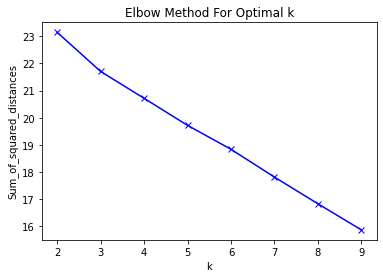

In [86]:
# Use Kmeans to fit clusters from 2 to 10 and plot it to see where out elbow is to use as a good cluster size
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,10)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [88]:
# Elbow at 6 clusters...
# #Lts see how the documents got grouped together
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
a_cl=pd.DataFrame(list(zip(raw_title_list,labels)),columns=['title','cluster'])
print(a_cl.sort_values(by=['cluster']))

/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

                                                title  cluster
17  Raise Green Engages IBM to Build a Solution to...        0
21  IBM Launches New and Enhanced Services to Help...        0
13  Cleveland Clinic and IBM Unveil Landmark 10-Ye...        0
22  IBM Launches Fourth Annual Call for Code Globa...        0
24  IBM's First Cloud Multizone Region in Latin Am...        0
25  Amazon CTO Werner Vogels: AWS will erase the l...        0
20  Intel (INTC) Announces $20B Investment to Rev ...        0
26  IBM Launches Multizone Region in Brazil as Cli...        0
6   IBM Cloud for Financial Services Accelerates I...        0
30  IBM Unveils New Capabilities Designed to Accel...        0
31  Oracle's Soft Guidance Overshadowed Strong Res...        0
2   IBM Cloud for Financial Services Supports Red ...        0
16  Tamara Franklin to Join Genpact's (G) Board of...        0
29  Alibaba's Ant Leads The Way Globally In Blockc...        1
23                        Is IBM Stock A Buy or Sell?  

In [89]:
# Install wordcloud package to see wordclouds easily for each cluster
!python -m pip install wordcloud

/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

Cluster: 0
Titles
How the Best Workplaces in Technology plan to g...
IBM: Nearly 3 in 4 Mall-goers Eager to Return t...
IBM Consumer Study Points to Potential Recovery...
Supreme Court Overturns Oracle’s Copyright Win ...
Amazon Says Most U.S. Employees Will Return to ...
Cleveland Clinic and IBM Unveil Landmark 10-Yea...
Tamara Franklin to Join Genpact's (G) Board of ...
Raise Green Engages IBM to Build a Solution to ...
IBM Positioned as a Leader in 2021 Gartner Magi...
IBM Launches Fourth Annual Call for Code Global...
Amazon CTO Werner Vogels: AWS will erase the li...
IBM Celebrates Global Women Leaders Shaping the...


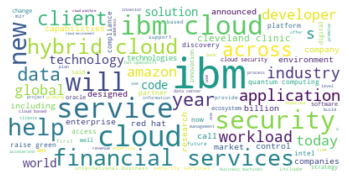

Cluster: 1
Titles
Semiconductor shortage could go on for 'a coupl...
We must balance higher corporate taxes with the...
Intel CEO: 'There is competitive fun going on w...
Intel (INTC) Announces $20B Investment to Rev U...


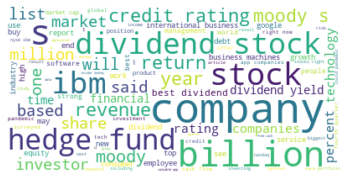

Cluster: 2
Titles
Celonis, IBM and Red Hat Form Strategic Partner...
German process mining startup Celonis teams up ...


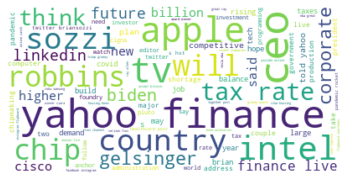

Cluster: 3
Titles
IBM Cloud for Financial Services Supports Red H...
IBM Cloud for Financial Services Accelerates In...
IBM Launches New and Enhanced Services to Help ...
IBM's First Cloud Multizone Region in Latin Ame...
IBM Launches Multizone Region in Brazil as Clie...
IBM Unveils New Capabilities Designed to Accele...


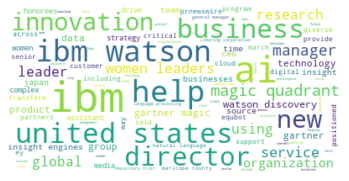

Cluster: 4
Titles
                 15 Best Dividend Stocks Right Now
IBM (IBM) Outpaces Stock Market Gains: What You...
A Closer Look At International Business Machine...
IBM (IBM) Dips More Than Broader Markets: What ...
                       Is IBM Stock A Buy or Sell?
Dynatrace LLC -- Moody's upgrades Dynatrace to ...
Oracle's Soft Guidance Overshadowed Strong Results
                    15 Most Valuable App Companies
                  10 Best Dividend Stocks For 2021
                7 Of The Best Tech Dividend Stocks


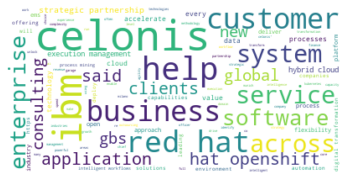

Cluster: 5
Titles
Alibaba's Ant Leads The Way Globally In Blockch...


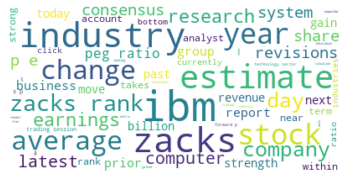

In [90]:
# For each cluster lets check out some wordclouds
from wordcloud import WordCloud

result={'cluster':labels,'wiki':raw_text_list}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()